In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler()

In [9]:
X_train = scaler.transform(X_train)

In [10]:
X_test = scaler.transform(X_test)

In [11]:
from sklearn.svm import SVC

In [12]:
from sklearn.model_selection import GridSearchCV

In [16]:
params = [
    {
        'kernel': ['linear'],
        'C': [0.01, 0.1, 1, 10]
    },
    {
        'kernel': ['rbf'],
        'C': [0.01, 0.1, 1, 10],
        'gamma': [0.01, 0.1, 1, 10]
    }
]

In [17]:
estimator = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv=5, verbose=5)

In [18]:
estimator.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.930 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.976 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.953 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.988 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.942 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.988 total time=   0.0s
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.976 total time=   0.0s
[CV 5/5] END ..............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10], 'kernel': ['linear']},
                         {'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf']}],
             scoring='accuracy', verbose=5)

In [19]:
estimator.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [20]:
model = estimator.best_estimator_

In [21]:
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [23]:
accuracy_score(y_test, y_pred)

0.9790209790209791

In [24]:
confusion_matrix(y_test, y_pred)

array([[50,  3],
       [ 0, 90]])

In [25]:
f1_score(y_test, y_pred)

0.9836065573770492

In [26]:
y_train_pred = model.predict(X_train)

In [27]:
accuracy_score(y_train, y_train_pred)

0.9859154929577465

In [28]:
confusion_matrix(y_train, y_train_pred)

array([[153,   6],
       [  0, 267]])

In [29]:
f1_score(y_train, y_train_pred)

0.9888888888888889

In [ ]:
# Kerneli

In [30]:
num_instances = 1000
X = np.random.uniform(low=-1, high=1, size=(num_instances, 2))

In [31]:
def f(x, y):
    return x**2 + y**2 <= 0.5

In [32]:
y = f(X[:,0], X[:,1])

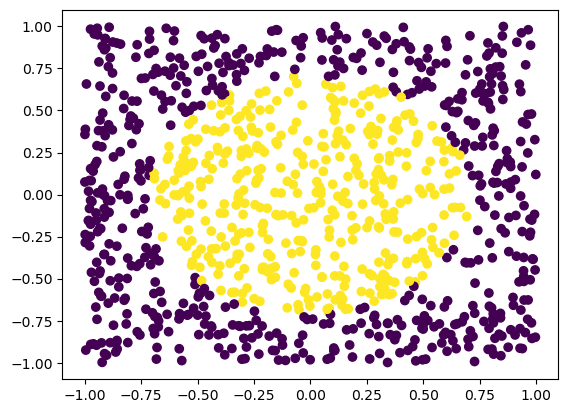

In [33]:
plt.scatter(X[:,0], X[:,1], c=y)

In [34]:
model = SVC(kernel='linear')

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

In [36]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [37]:
y_train_pred = model.predict(X_train)

In [38]:
accuracy_score(y_train, y_train_pred)

0.5986666666666667

In [39]:
y_test_pred = model.predict(X_test)

In [40]:
accuracy_score(y_test, y_test_pred)

0.6

In [42]:
model = SVC(kernel='rbf')

In [43]:
model.fit(X_train, y_train)

SVC()

In [44]:
y_train_pred = model.predict(X_train)

In [45]:
accuracy_score(y_train, y_train_pred)

0.988

In [46]:
y_test_pred = model.predict(X_test)

In [47]:
accuracy_score(y_test, y_test_pred)

0.98

In [48]:
print(f'Broj potpornih vekota: {model.n_support_}')

Broj potpornih vekota: [76 76]


In [49]:
print(f'Indeksi instanici koji su potporni vektori: {model.support_}')

Indeksi instanici koji su potporni vektori: [  8   9  20  60  66  74  76  80  83  86  89  90 105 134 139 143 150 153
 201 209 211 222 225 232 257 258 264 273 285 286 312 321 339 345 346 353
 360 365 373 377 392 401 408 409 418 422 433 442 451 454 470 479 486 496
 502 507 539 540 582 584 587 589 601 605 628 657 659 663 681 682 686 693
 713 720 723 737   4  14  17  37  38  45  62  68  75  81 102 103 108 112
 120 132 138 162 164 168 172 176 189 206 218 219 244 248 251 263 281 283
 313 323 325 326 340 343 351 383 387 395 406 435 447 457 493 504 508 516
 520 522 529 546 554 562 583 593 602 603 616 618 645 648 665 676 677 685
 697 700 708 709 728 731 743 746]


In [50]:
print(f'Sami potporni vektori: {model.support_vectors_}')

Sami potporni vektori: [[ 0.38070693  0.61144433]
 [ 0.71118726 -0.40598179]
 [-0.75675886  0.18242077]
 [-0.75098087  0.1493023 ]
 [ 0.36695577  0.63785153]
 [ 0.13036156  0.78730392]
 [-0.49189053 -0.58706958]
 [ 0.22937141  0.73979684]
 [ 0.69356209 -0.40604323]
 [-0.4470562  -0.59978666]
 [ 0.74634987  0.11452708]
 [-0.38065858  0.5985789 ]
 [ 0.71882886  0.11292626]
 [ 0.62604455  0.34909549]
 [ 0.18956966 -0.798506  ]
 [ 0.45869138 -0.54520703]
 [-0.75116377  0.081482  ]
 [-0.56862767  0.51895823]
 [-0.67122046 -0.3938723 ]
 [ 0.14707214  0.74999602]
 [ 0.62939608  0.49340397]
 [-0.46114737  0.6185439 ]
 [-0.68440172 -0.32318907]
 [-0.48737777 -0.58754503]
 [ 0.43792546 -0.59972368]
 [ 0.08066139  0.70281102]
 [ 0.16066476 -0.80432585]
 [ 0.43071034  0.59561843]
 [-0.71713042  0.16045546]
 [ 0.60065595  0.40100104]
 [ 0.01040116 -0.74048499]
 [-0.71486515  0.11467994]
 [-0.02788437 -0.72774235]
 [-0.51148984 -0.53455211]
 [-0.71028841  0.20107511]
 [-0.21406611 -0.78141064]
 [ 0.

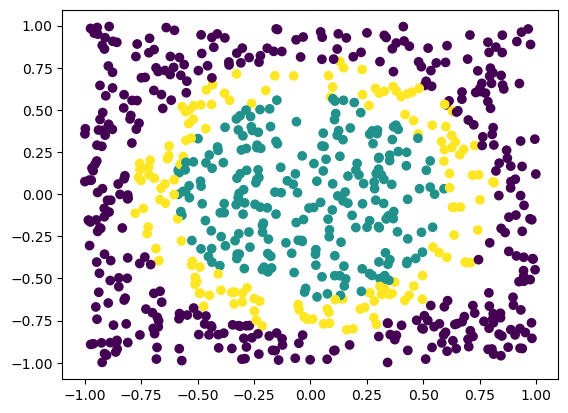

In [51]:
color = y_train.astype(int)
color[model.support_] = 2
plt.scatter(X_train[:,0], X_train[:,1], c=color)
plt.show()